In [1]:
import os
from pathlib import Path

from es_sfgtools.data_mgmt.data_handler import DataHandler
pride_path = Path.home() / ".PRIDE_PPPAR_BIN"
os.environ["PATH"] += os.pathsep + str(pride_path)
import matplotlib.pyplot as plt
%matplotlib ipympl


In [2]:
main_dir = Path("/Users/franklyndunbar/Project/SeaFloorGeodesy/Data/SFGMain")
dh = DataHandler(main_dir)

network = "cascadia-gorda"
station = "NCC1"
survey = "2024_A_1126"

dh.change_working_station(network=network, station=station, campaign=survey)



In [3]:
print(dates:=dh.kin_position_tdb.get_unique_dates())

['2023-09-08' '2023-09-09' '2023-09-10' '2023-09-11' '2023-09-12'
 '2023-09-13' '2023-09-14']


In [4]:
dates[0]

numpy.datetime64('2023-09-08')

In [5]:
kin_positions = dh.kin_position_tdb.read_df(dates[0], dates[1])
shotdata = dh.shotdata_tdb.read_df(dates[0], dates[1])

In [6]:
kin_positions.head()

,time,latitude,longitude,height,east,north,up,number_of_satellites,pdop,wrms
0,2023-09-08 14:26:12.699,41.663436,235.078319,-29.3856,-2.731709e+06,-3.912657e+06,4.217731e+06,1,9.58,0.178201
1,2023-09-08 14:26:13.699,41.663436,235.078315,-28.6044,-2.731709e+06,-3.912657e+06,4.217731e+06,1,9.57,0.043983
2,2023-09-08 14:26:14.699,41.663442,235.078312,-28.9660,-2.731709e+06,-3.912656e+06,4.217731e+06,1,9.56,0.049103
3,2023-09-08 14:26:15.700,41.663454,235.078306,-28.9800,-2.731709e+06,-3.912655e+06,4.217732e+06,1,9.55,0.000000
4,2023-09-08 14:26:16.700,41.663462,235.078300,-28.0135,-2.731709e+06,-3.912655e+06,4.217734e+06,1,9.54,0.022012


In [20]:
shotdata = shotdata[shotdata.transponderID=="IR5209"]
shotdata.pingTime -= 15
shotdata.returnTime -= 15

In [14]:
import datetime
datetime.datetime.fromtimestamp(shotdata['pingTime'].iloc[0] )

datetime.datetime(2023, 9, 7, 22, 8, 23)

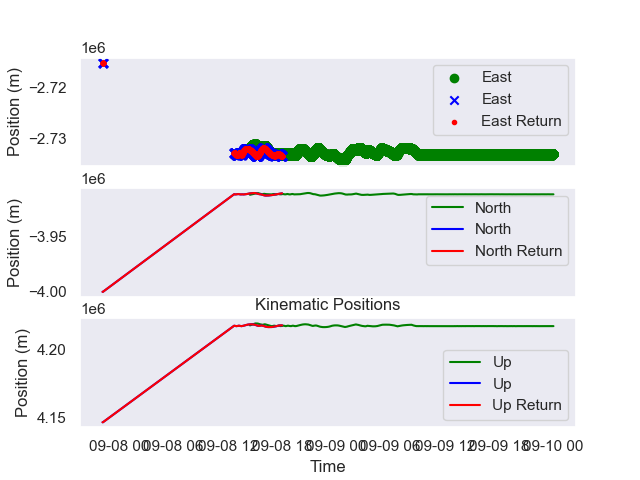

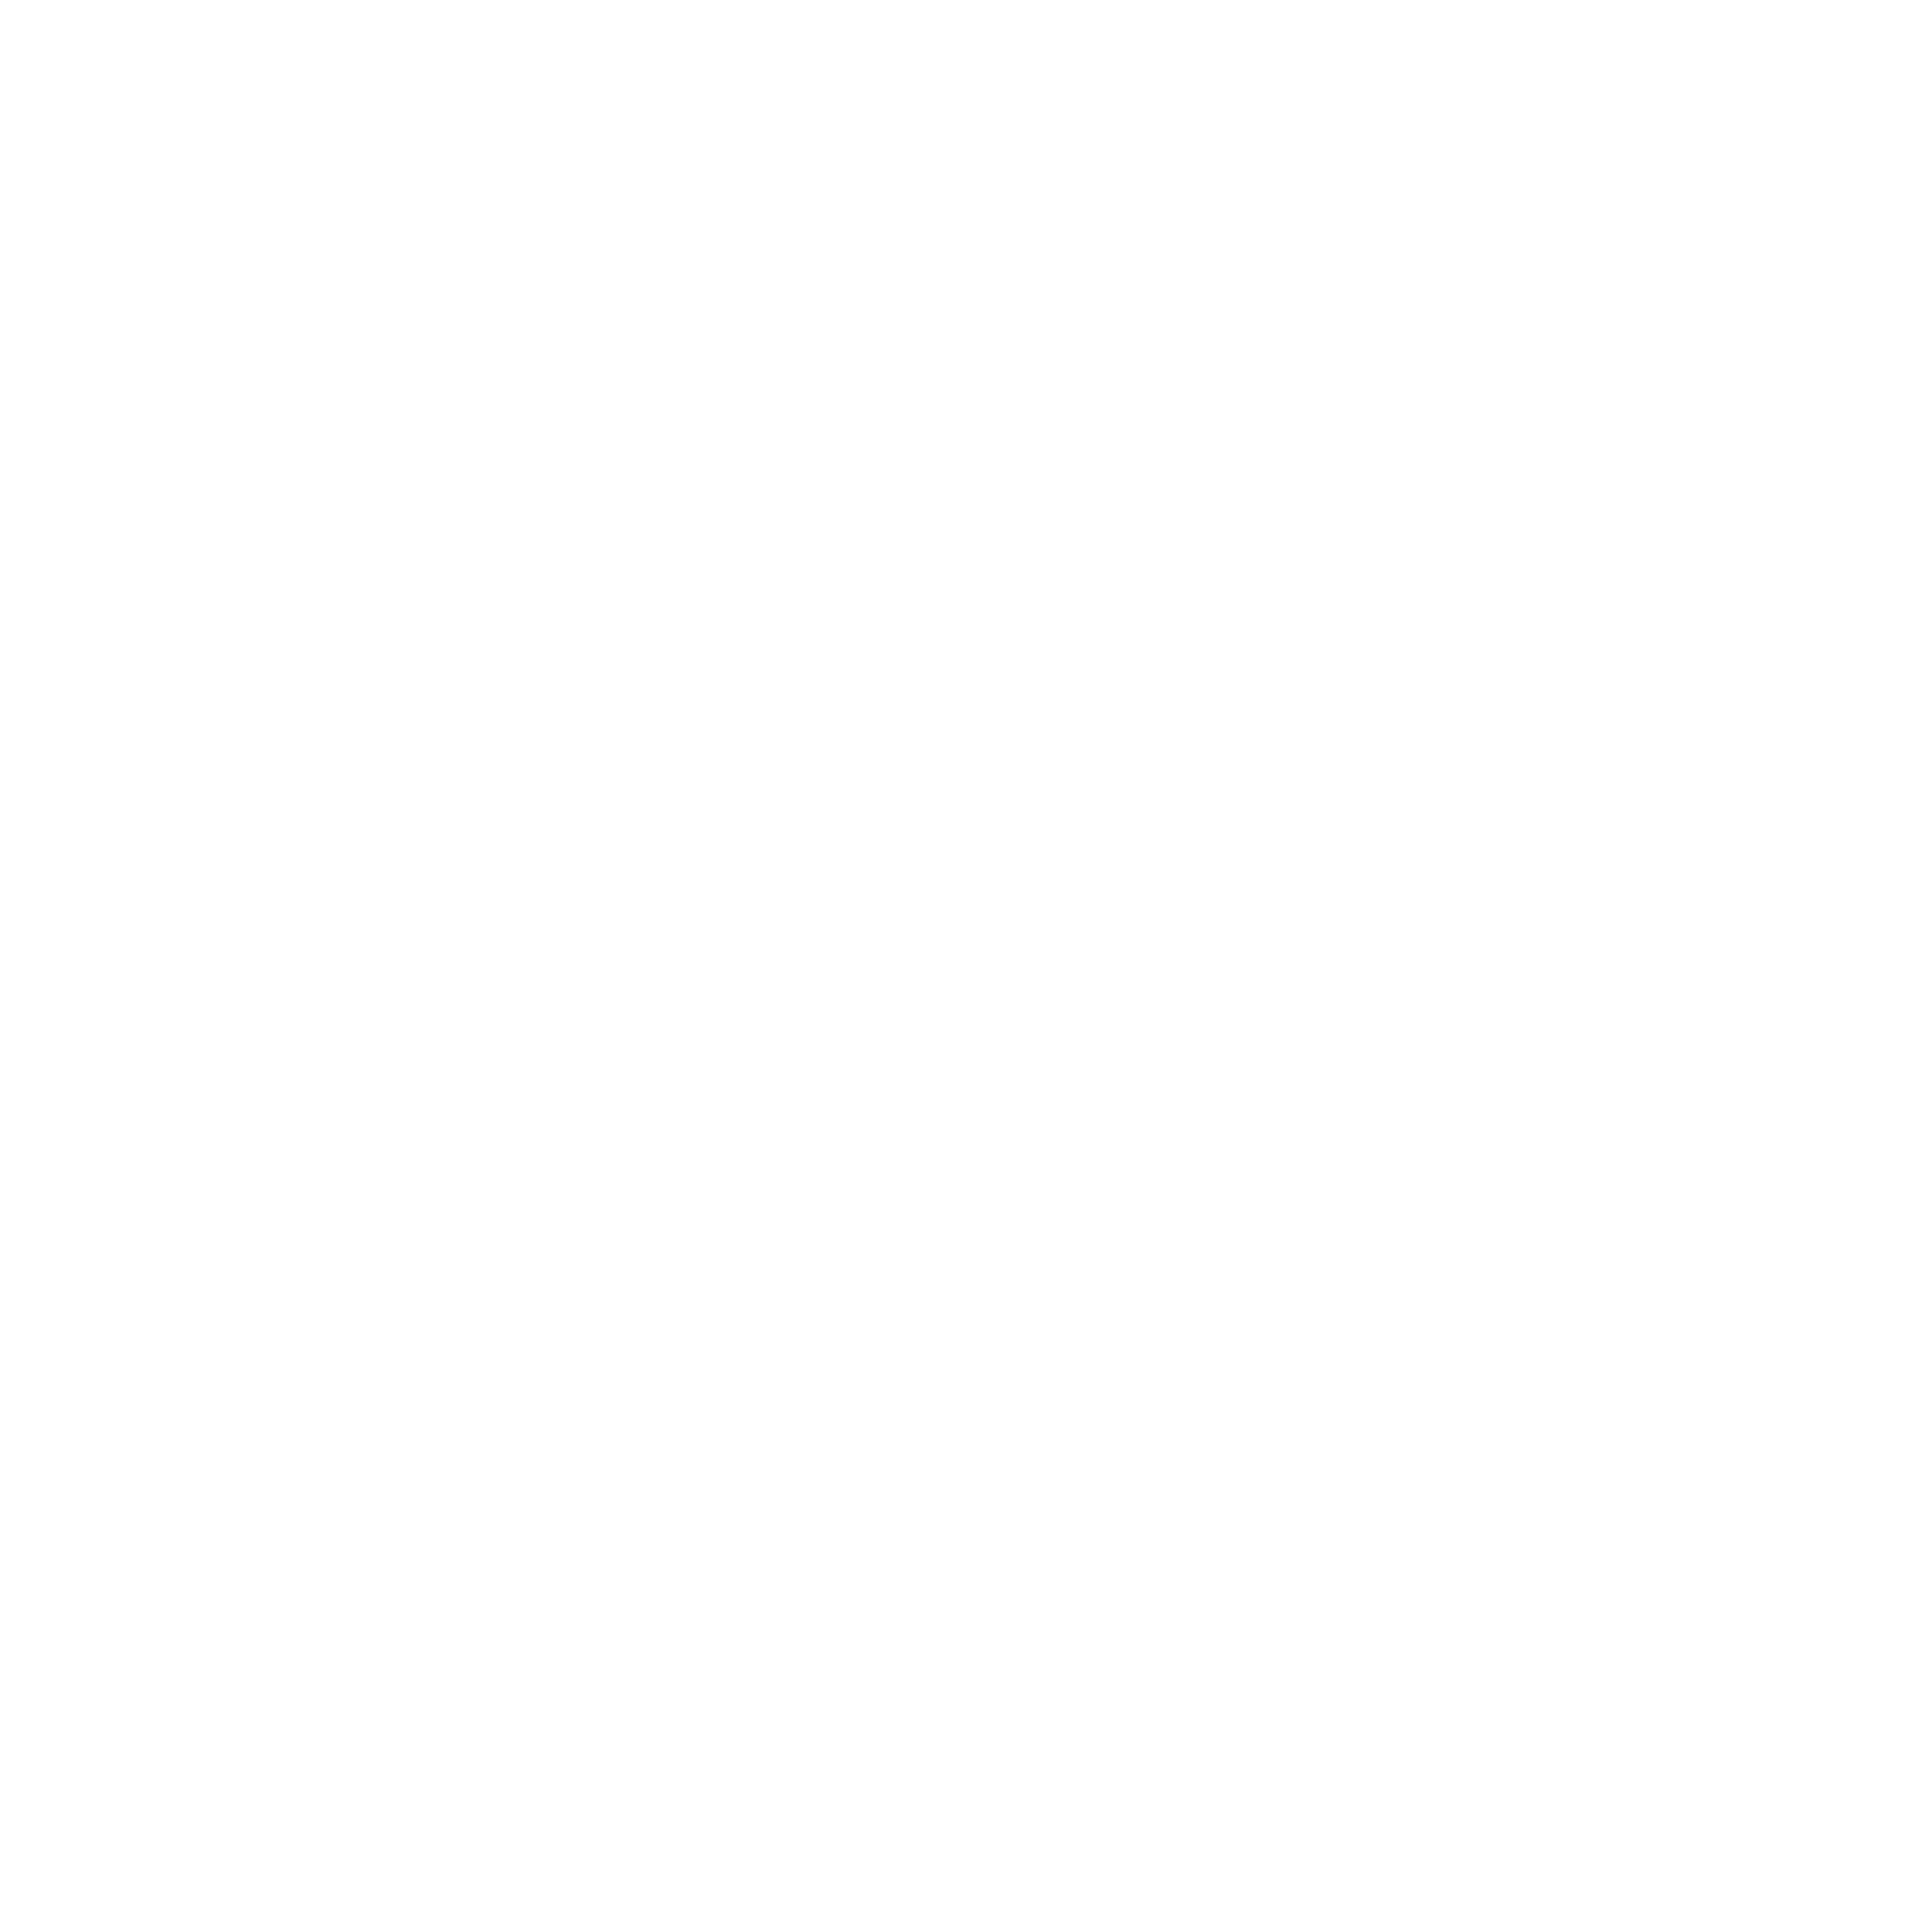

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import NavigationToolbar2Tk

plt.ion()  # Turn on interactive mode
plt.figure(figsize=(16*2, 16*2))
fig,axes = plt.subplots(3,1,sharex=True)

axes[0].scatter(kin_positions['time'], kin_positions["east"], label='East',color='green')
axes[0].scatter(shotdata['pingTime'].apply(lambda x: datetime.datetime.fromtimestamp(x)), shotdata["east0"], label='East',color='blue',marker='x')
axes[0].scatter(shotdata['returnTime'].apply(lambda x: datetime.datetime.fromtimestamp(x)), shotdata["east1"], label='East Return',color='red',marker='.')
axes[0].set_ylabel('Position (m)')
axes[0].legend()
axes[0].grid()

axes[1].scatter(kin_positions['time'], kin_positions["north"], label='North',color='green')
axes[1].scatter(shotdata['pingTime'].apply(lambda x: datetime.datetime.fromtimestamp(x)), shotdata["north0"], label='North',color='blue',marker='x')
axes[1].scatter(shotdata['returnTime'].apply(lambda x: datetime.datetime.fromtimestamp(x)), shotdata["north1"], label='North Return',color='red',marker='.')
axes[1].set_ylabel('Position (m)')
axes[1].legend()
axes[1].grid()

axes[2].scatter(kin_positions['time'], kin_positions["up"], label='Up',color='green')
axes[2].scatter(shotdata['pingTime'].apply(lambda x: datetime.datetime.fromtimestamp(x)), shotdata["up0"], label='Up',color='blue',marker='x')
axes[2].scatter(shotdata['returnTime'].apply(lambda x: datetime.datetime.fromtimestamp(x)), shotdata["up1"], label='Up Return',color='red',marker='.')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Position (m)')
axes[2].legend()
axes[2].grid()

plt.title('Kinematic Positions')
plt.show()